### 4.1 누락된 데이터 다루기

In [2]:
import numpy as np
import pandas as pd
from io import StringIO

In [3]:
csv_data = """A,B,C,D
... 1.0,2.0,3.0,4.0
... 5.0,6.0,,8.0
... 10.0,11.0,12.0,"""

In [4]:
df=pd.read_csv(StringIO(csv_data))

In [5]:
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


<b>누락된 값의 개수</b>

In [6]:
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

넘파이 배열로 출력

In [7]:
df.values

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [10., 11., 12., nan]])

### 누락된 값이 있는 샘플이나 특성 제외

In [8]:
df.dropna(axis=0)#누락 값 있는 행 제외

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [9]:
df.dropna(axis=1)#누락 값 있는 열 제외

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [10]:
df.dropna(how='all')#모든 열이 NaN있을 때 행 삭제

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [11]:
df.dropna(thresh=4)#실수 값이 네 개 보다 작은 행을 삭제

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [12]:
df.dropna(subset=['C'])#C열에 있는 NAN 행 삭제

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


### 누락된 값 대체

In [13]:
!pip install Imputer

ERROR: Could not find a version that satisfies the requirement Imputer (from versions: none)
ERROR: No matching distribution found for Imputer


In [14]:
#열 방향으로 대체
from sklearn.impute import SimpleImputer
simr_mean = SimpleImputer(missing_values=np.nan, strategy = 'mean')#평균
simr_median = SimpleImputer(missing_values=np.nan, strategy = 'median')#평균
simr_most_frequent = SimpleImputer(missing_values=np.nan, strategy = 'most_frequent')#평균

In [15]:
simr_mean = simr_mean.fit(df.values)
imputed_data_mean = simr_mean.transform(df.values)

In [16]:
imputed_data_mean

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

In [17]:
simr_median = simr_median.fit(df.values)
imputed_data_median = simr_median.transform(df.values)

In [18]:
imputed_data_median

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

In [19]:
simr_most_frequent = simr_most_frequent.fit(df.values)
imputed_data_most_frequent = simr_most_frequent.transform(df.values)

In [20]:
imputed_data_most_frequent

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6.,  3.,  8.],
       [10., 11., 12.,  4.]])

In [21]:
#행 방향으로 누락 값 대체하기
from sklearn.preprocessing import FunctionTransformer
simr = SimpleImputer(missing_values=np.nan, strategy='mean')
ftr_simr = FunctionTransformer(lambda X: simr.fit_transform(X.T).T, validate = False)
imputed_data = ftr_simr.fit_transform(df.values)
imputed_data

array([[ 1.        ,  2.        ,  3.        ,  4.        ],
       [ 5.        ,  6.        ,  6.33333333,  8.        ],
       [10.        , 11.        , 12.        , 11.        ]])

### 범주형 데이터 다루기

In [22]:
df = pd.DataFrame([['green','M',10.1,'class1'],
                  ['red','L',13.5,'class2'],
                  ['blue','XL',15.3,'class1']])
df.columns = ['color','size','price','classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


### 순서 특성 매핑

In [23]:
size_mapping = {
    'XL':3,
    'L':2,
    'M':1
}

In [24]:
df['size'] = df['size'].map(size_mapping)#문자열->정수

In [25]:
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [26]:
#원래대로 돌려놓기(정수->문자열)
inv_size_mapping = {v:k for k, v in size_mapping.items()}
df['size'].map(inv_size_mapping)

0     M
1     L
2    XL
Name: size, dtype: object

In [27]:
inv_size_mapping#순서 바꿈

{3: 'XL', 2: 'L', 1: 'M'}

### 클래스 레이블 인코딩

In [28]:
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [29]:
class_mapping = {label:idx for idx,label in enumerate(np.unique(df['classlabel']))}

In [30]:
class_mapping

{'class1': 0, 'class2': 1}

In [31]:
df['classlabel'] = df['classlabel'].map(class_mapping)#문자열 -> 정수

In [32]:
df

,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


In [33]:
#원래대로(정수->문자열)
inv_class_mapping = {v:k for k,v in class_mapping.items()}
inv_class_mapping

{0: 'class1', 1: 'class2'}

In [34]:
df['classlabel'] = df['classlabel'].map(inv_class_mapping)

In [35]:
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


LabelEncoder 사용

In [36]:
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()

In [37]:
y = class_le.fit_transform(df['classlabel'].values)#클래스 레이블 인코딩

In [38]:
y

array([0, 1, 0])

In [39]:
#원래대로 돌려놓기
class_le.inverse_transform(y)

array(['class1', 'class2', 'class1'], dtype=object)

In [40]:
class_le

LabelEncoder()

In [41]:
y

array([0, 1, 0])

### 순서가 없는 특성에 원-핫 인코딩 적용

In [42]:
X = df[['color','size','price']].values

In [43]:
X

array([['green', 1, 10.1],
       ['red', 2, 13.5],
       ['blue', 3, 15.3]], dtype=object)

In [44]:
color_le = LabelEncoder()

In [45]:
X[:,0]

array(['green', 'red', 'blue'], dtype=object)

In [46]:
X[:,0] = color_le.fit_transform(X[:,0])

In [47]:
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

여러 개의 열을 한 번에 정수로 변환

In [48]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder(dtype = np.int)
col_trans = ColumnTransformer([('ord_enc',ord_enc, ['color'])])

In [49]:
X_trans = col_trans.fit_transform(df)

In [50]:
X_trans

array([[1],
       [2],
       [0]])

In [51]:
#인코딩된 값을 다시 변환
col_trans.named_transformers_['ord_enc'].inverse_transform(X_trans)

array([['green'],
       ['red'],
       ['blue']], dtype=object)

In [52]:
from sklearn.preprocessing import OneHotEncoder
#업데이트 전 버전에서 에러남
ohe = OneHotEncoder(categorical_features = [0])#특성의 열의 위치

TypeError: __init__() got an unexpected keyword argument 'categorical_features'

In [53]:
ohe.fit_transform(X).toarray()#업데이트 전 버전에서 에러남

NameError: name 'ohe' is not defined

In [54]:
#업데이트 된 버전 사용
X#0번째 column one-hot encoding 예정

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

In [55]:
oh_enc = OneHotEncoder(categories='auto')

In [56]:
col_trans = ColumnTransformer([('oh_enc',oh_enc, [0])], remainder='passthrough')

In [57]:
col_trans.fit_transform(X)

array([[0.0, 1.0, 0.0, 1, 10.1],
       [0.0, 0.0, 1.0, 2, 13.5],
       [1.0, 0.0, 0.0, 3, 15.3]], dtype=object)

<b>get_dummies 메서드 사용 </b>

In [58]:
df[['price','color','size']]

,price,color,size
0,10.1,green,1
1,13.5,red,2
2,15.3,blue,3


In [59]:
pd.get_dummies(df[['price','color','size']])

,price,size,color_blue,color_green,color_red
0,10.1,1,0,1,0
1,13.5,2,0,0,1
2,15.3,3,1,0,0


<b>다중 공선성 문제 해결 </b>

In [60]:
pd.get_dummies(df[['price','color','size']], drop_first=True)

,price,size,color_green,color_red
0,10.1,1,1,0
1,13.5,2,0,1
2,15.3,3,0,0


### 훈련 세트와 테스트 세트로 나누기

In [71]:
df_wine = pd.read_csv('C:/Users/LG/Desktop/2021/여름방학/MachineLearningTextbook/wine.data.txt',
                header=None)

In [72]:
df_wine.columns = [
    'Class label',
    'Alcohol',
    'Malic acid',
    'Ash',
    'Alcalinity of ash',
    'Magnesium',
    'Total phenols',
    'Flavanoids',
    'Nonfalvanoid phenols',
    'Proanthocyanins',
    'Color intensity',
    'Hue',
    'OD280/OD315 of diluted wines',
    'Proline'
]

In [73]:
print('클래스 레이블',np.unique(df_wine['Class label']))

클래스 레이블 [1 2 3]


In [74]:
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonfalvanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [75]:
#훈련세트와 테스트 세트 나눔
from sklearn.model_selection import train_test_split
X,y = df_wine.iloc[:,1:].values, df_wine.iloc[:,0].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=0, 
                                                 stratify=y)#훈련 세트와 테스트 세트에 있는 클래스 비율이 원본 데이터셋과 동일하게 유지됨

### 특성 스케일 맞추기
- 정규화: [0,1] 범위에 맞추는 것
- 표준화: 평균을 0에 맞추고 표준편차를 1로 만들어 정규 분포와 같은 특징을 가지도록 만듦

<b>정규화; 최소-최대 스케일 변환 기능</b>

Min-max scaling


$$X^{(i)}_{norm} = \frac{X^{(i)}-X_{min}}{X_{max}-X_{min}}$$

In [76]:
from sklearn.preprocessing import MinMaxScaler#사이킷런 제공 정규화
mms = MinMaxScaler()

In [77]:
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

<b>표준화</b>

$$ X^{(i)}_{std} = \frac{X^{(i)}-\mu_x}{\sigma_x} $$

$\mu_x$: 어던 특성의 샘플 평균
$\sigma_x$: 어떤 특성의 표준편차

In [78]:
ex = np.array([0,1,2,3,4,5])
print("표준화:",(ex-ex.mean())/ex.std())#표준화

표준화: [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]


In [79]:
print("정규화:",(ex-ex.min())/(ex.max()-ex.min()))#정규화

정규화: [0.  0.2 0.4 0.6 0.8 1. ]


In [80]:
from sklearn.preprocessing import StandardScaler#사이킷런 제공 표준화
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

### 규제

<b>L1 규제</b>
$$L1:  \parallel w\parallel_1 = \sum_{j=1}^{m} \mid w_{j} \mid $$
$$L2:  \parallel w\parallel^{2}_2 = \sum_{j=1}^{m} w^2_{j} $$

In [81]:
from sklearn.linear_model import LogisticRegression
LogisticRegression(solver='liblinear',multi_class='auto',penalty = 'l1')#l1규제

LogisticRegression(penalty='l1', solver='liblinear')

In [82]:
lr = LogisticRegression(solver='liblinear',multi_class='auto',penalty = 'l1', C=1.0, random_state=42)#l1규제

In [83]:
lr.fit(X_train_std,y_train)

LogisticRegression(penalty='l1', random_state=42, solver='liblinear')

In [84]:
print("훈련 정확도: ",lr.score(X_train_std, y_train))

훈련 정확도:  1.0


In [85]:
print("테스트 정확도: ",lr.score(X_test_std,y_test))

테스트 정확도:  1.0


In [86]:
lr.coef_

array([[ 1.24576659,  0.18058767,  0.74350018, -1.16124724,  0.        ,
         0.        ,  1.16980876,  0.        ,  0.        ,  0.        ,
         0.        ,  0.54766459,  2.51035195],
       [-1.53733962, -0.38708383, -0.99527244,  0.36471957, -0.05950713,
         0.        ,  0.66789801,  0.        ,  0.        , -1.93398986,
         1.2340047 ,  0.        , -2.23193492],
       [ 0.13548833,  0.16993776,  0.35772851,  0.        ,  0.        ,
         0.        , -2.43321771,  0.        ,  0.        ,  1.56140709,
        -0.81736863, -0.49774774,  0.        ]])

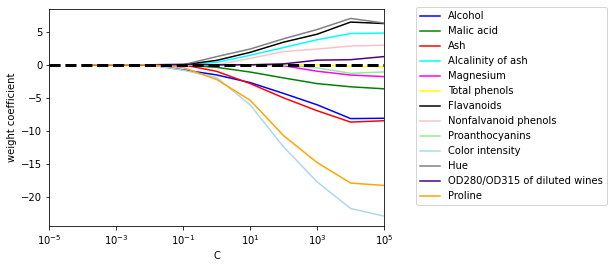

In [89]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.subplot(111)
colors = ['blue','green','red','cyan','magenta','yellow','black','pink','lightgreen','lightblue','gray','indigo','orange']
weights, params = [],[]
for c in np.arange(-4.,6.):
    lr = LogisticRegression(solver='liblinear',multi_class='auto',penalty='l1',C=10.**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)
weights = np.array(weights)
for column, color in zip(range(weights.shape[1]),colors):
    plt.plot(params, weights[:,column],
            label = df_wine.columns[column+1],
            color = color)
plt.axhline(0,color='black',linestyle = '--', linewidth = 3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc = 'upper left')
ax.legend(loc='upper center',bbox_to_anchor = (1.38,1.03), ncol=1, fancybox = True)
plt.show()

### 순차 후진 선택 Seqiential Backward Selection, SBS(차원 축소)
- 종류: 그리디 알고리즘
- 목적: 주어진 문제에서 가장 관련이 높은 특성 부분 집합을 자동으로 선택하는 것
- 동작: 새로운 특성의 부분 공간이 목표하는 특성 개수가 될 때까지 전체 특성에서 순차적으로 특성을 제거
- 요약: 각 단계에서 제거했을 때 성능 손실이 최대가 되는 특성을 제거
- 사용: 규제를 제공하지 않는 알고리즘 사용시 과대적합의 문제를 안고 있는 모델의 예측 성능을 높일 때 유용

In [90]:
from sklearn.base import clone
from itertools import combinations#조합
import numpy as np
from sklearn.metrics import accuracy_score #정확도
from sklearn.model_selection import train_test_split

In [99]:
class SBS():#순차후진선택
    def __init__(self, estimator, k_features,
            scoring=accuracy_score,#특성 부분 집합에 대한 성능평가
            test_size = 0.25, random_state = 1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state
    
    def fit(self, X,y):#훈련
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=self.test_size, random_state=self.random_state)#분리
        
        dim = X_train.shape[1]#차원
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, X_test, y_test, self.indices_)
        self.scores_ = [score]
        
        while dim> self.k_features:#원하는 차원이 나올 때까지 반복
            scores = []
            subsets = []
            
            for p in combinations(self.indices_, r=dim-1):#특성 조합
                score = self._calc_score(X_train,y_train,X_test,y_test,p)
                scores.append(score)
                subsets.append(p)
            
            #제거했을 때 성능손실이 최대가 되는 특성 제거
            best = np.argmax(scores)
            self.indices_ = subsets[best]#최종 선택된 특성의 열 index
            self.subsets_.append(self.indices_)
            dim -= 1
            self.scores_.append(scores[best])#최적 조합의 정확도 점수
        self.k_score_ = self.scores_[-1]
        
        return self
    
    def transform(self,X):#선택된 특성 열로 구성된 새로운 데이터 배열을 반환
        
        return X[:, self.indices_]
    
    def _calc_score(self, X_train, y_train, X_test,y_test, indices):
        self.estimator.fit(X_train[:,indices], y_train)
        y_pred = self.estimator.predict(X_test[:,indices])
        score = self.scoring(y_test,y_pred)
        return score
    

In [93]:
#KNN 분류기를 사용한 SBS 작동
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier#KNN
knn= KNeighborsClassifier(n_neighbors= 5)

In [101]:
sbs = SBS(knn, k_features = 1)
sbs.fit(X_train_std,y_train)

In [102]:
k_feat = [len(k) for k in sbs.subsets_]

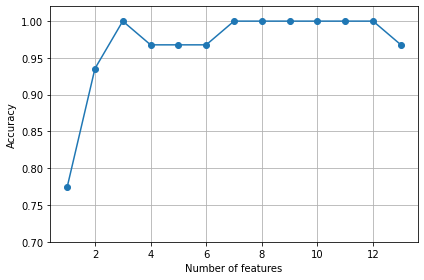

In [103]:
#최적의 특성 조합에 따른 성능
plt.plot(k_feat, sbs.scores_, marker = 'o')
plt.ylim([0.7,1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()

In [104]:
k3 = list(sbs.subsets_[10])

In [105]:
print(df_wine.columns[1:][k3])#k=3에서 높은 검증 세트 성능을 내는 특성

Index(['Alcohol', 'Malic acid', 'OD280/OD315 of diluted wines'], dtype='object')


In [107]:
#테스트 세트에서 KNN 분류기의 성능 평가
knn.fit(X_train_std,y_train)
print("훈련 정확도:", knn.score(X_train_std,y_train))
print("테스트 정확도:",knn.score(X_test_std,y_test))

훈련 정확도: 0.967741935483871
테스트 정확도: 0.9629629629629629


In [108]:
#세 개의 특성에서 knn 성능
knn.fit(X_train_std[:,k3],y_train)
print("훈련 정확도:", knn.score(X_train_std[:,k3],y_train))
print("테스트 정확도:",knn.score(X_test_std[:,k3],y_test))

훈련 정확도: 0.9516129032258065
테스트 정확도: 0.9259259259259259


### 랜덤포레스트의 특성 중요도 사용

In [109]:
from sklearn.ensemble import RandomForestClassifier#랜덤포레스트
feat_labels = df_wine.columns[1:]#특성라벨
forest = RandomForestClassifier(n_estimators=500, random_state=1)#랜덤포레스트 분류기

In [110]:
forest.fit(X_train,y_train)#훈련

RandomForestClassifier(n_estimators=500, random_state=1)

In [111]:
importances = forest.feature_importances_#특성 중요도
indices = np.argsort(importances)[::-1]

 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529
 6) Hue                            0.058739
 7) Total phenols                  0.050872
 8) Magnesium                      0.031357
 9) Malic acid                     0.025648
10) Proanthocyanins                0.025570
11) Alcalinity of ash              0.022366
12) Nonfalvanoid phenols           0.013354
13) Ash                            0.013279


<BarContainer object of 13 artists>

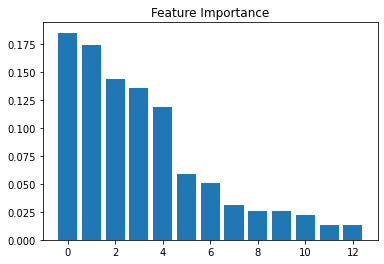

In [113]:
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f"%(f+1,30,feat_labels[indices[f]],importances[indices[f]]))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]),importances[indices],align='center')#합이 1임

In [114]:
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(forest, threshold = 0.1, prefit = True)
X_selected = sfm.transform(X_train)
print("이 임계 조건을 만족하는 샘플의 수:",X_selected.shape[1])


이 임계 조건을 만족하는 샘플의 수: 5


In [115]:
for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f"%(f+1,30,feat_labels[indices[f]],importances[indices[f]]))


 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529
